# Decision Tree

About the data: 

Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
# Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DE
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
comp=pd.read_csv("/content/Company_Data.csv")

In [3]:
comp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
comp.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
comp.shape

(400, 11)

In [6]:
comp.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


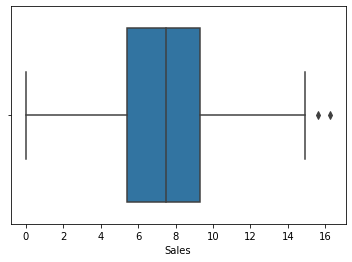

In [7]:
sns.boxplot(comp["Sales"])

In [8]:
def split(num):
    if num < 5:
        return "low sale"
    elif num>= 5 and num<10:
        return "average sale"
    else:
        return "high sale"
    
comp.Sales=comp.Sales.apply(split)
    

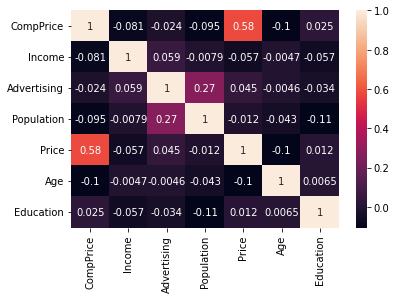

In [9]:
corr=comp.corr()
sns.heatmap(corr,annot=True)

In [10]:
comp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,average sale,138,73,11,276,120,Bad,42,17,Yes,Yes
1,high sale,111,48,16,260,83,Good,65,10,Yes,Yes
2,high sale,113,35,10,269,80,Medium,59,12,Yes,Yes
3,average sale,117,100,4,466,97,Medium,55,14,Yes,Yes
4,low sale,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,high sale,138,108,17,203,128,Good,33,14,Yes,Yes
396,average sale,139,23,3,37,120,Medium,55,11,No,Yes
397,average sale,162,26,12,368,159,Medium,40,18,Yes,Yes
398,average sale,100,79,7,284,95,Bad,50,12,Yes,Yes


In [11]:
le=LabelEncoder()

In [12]:
comp["ShelveLoc"]=le.fit_transform(comp["ShelveLoc"])
comp["Urban"]=le.fit_transform(comp["Urban"])
comp["US"]=le.fit_transform(comp["US"])

In [13]:
y=comp.iloc[:,0]
x=comp.iloc[:,1:11]

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [15]:
model=DE(criterion="entropy",max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [16]:
from sklearn import tree

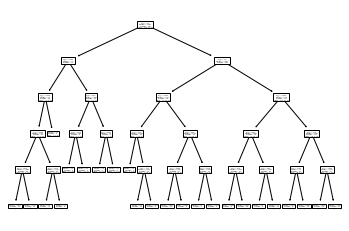

In [17]:
tree.plot_tree(model);

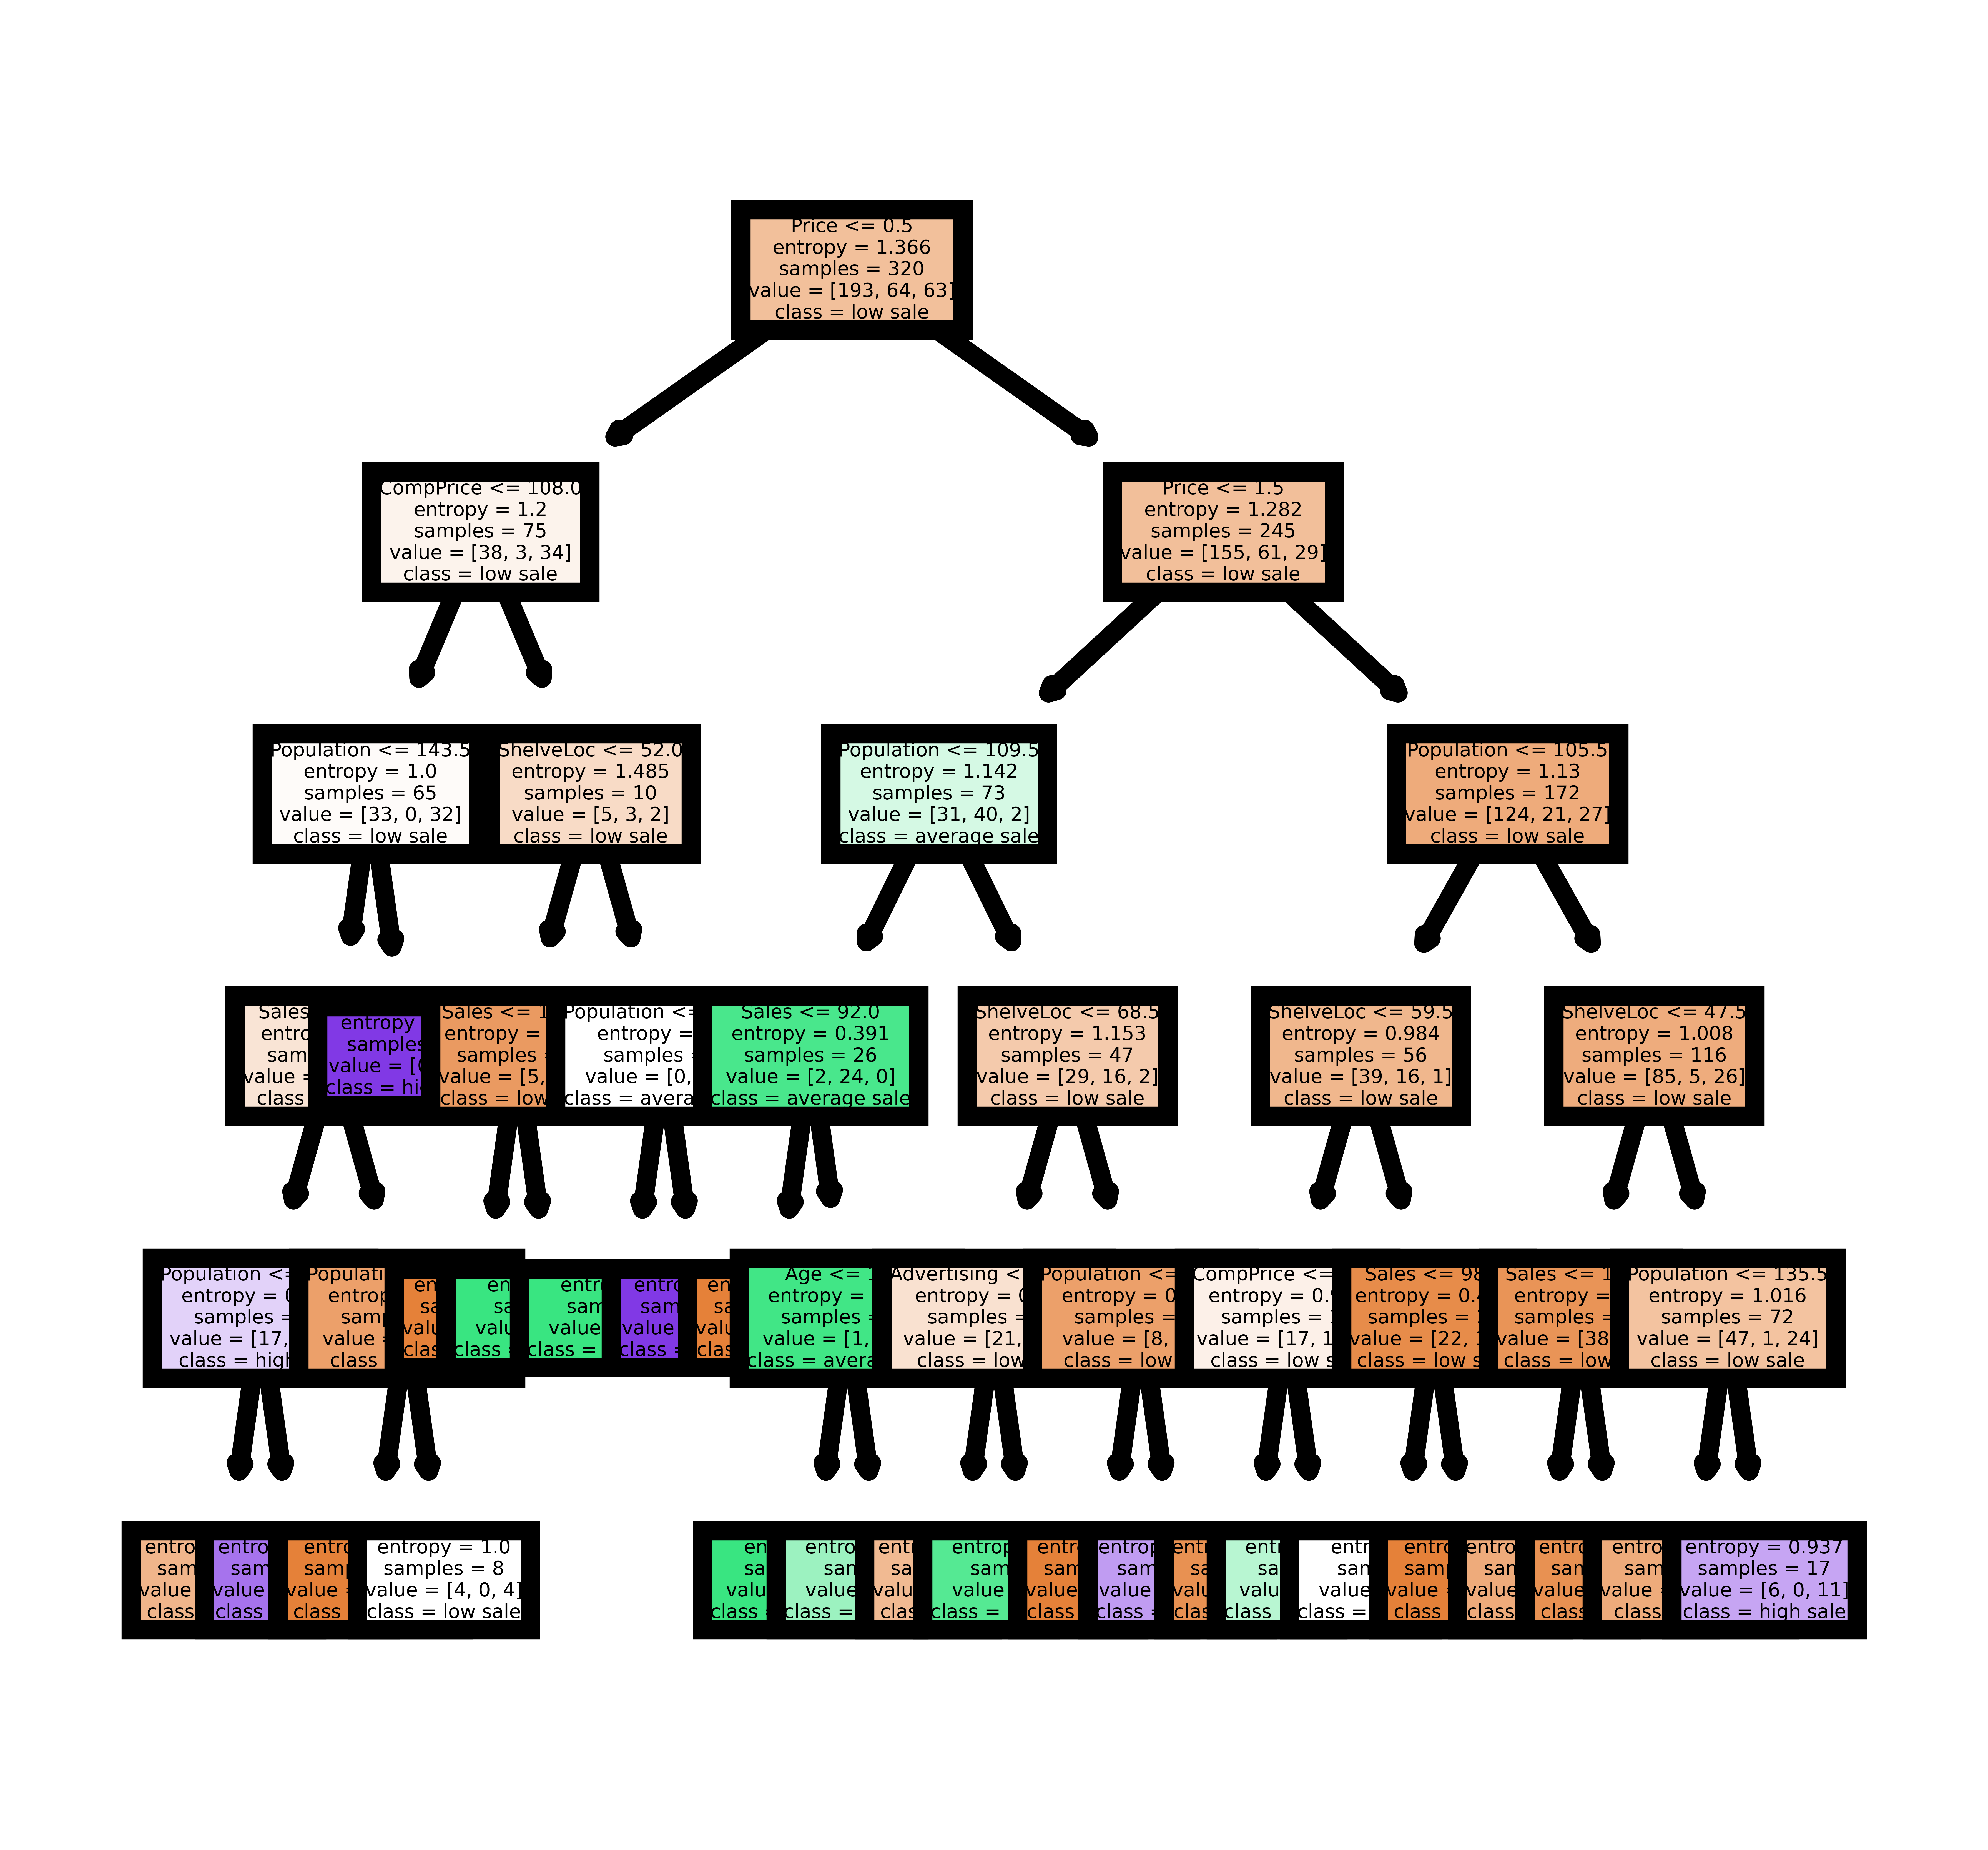

In [18]:
fn=["Sales","CompPrice","Income","Advertising","Population","Price","ShelveLoc","Age","Education","Urban","US"]
cn=["low sale","average sale","high sale"]
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(1.5,1.5),dpi=5000)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [19]:
preds=model.predict(x_test)

In [20]:
confusion_matrix(y_test,preds)

array([[37,  5,  9],
       [ 8,  7,  0],
       [ 8,  1,  5]])

In [21]:
accuracy_score(y_test,preds)

0.6125

In [22]:
pd.Series(preds).value_counts()

average sale    53
low sale        14
high sale       13
dtype: int64

In [23]:
df=pd.DataFrame({"actual":y_test,"predicted":preds})

In [24]:
df

,actual,predicted
92,low sale,average sale
269,average sale,average sale
129,low sale,high sale
355,average sale,average sale
86,average sale,average sale
...,...,...
216,average sale,average sale
177,high sale,high sale
383,average sale,high sale
58,average sale,low sale
